Mounted at /content/drive
PROJECT_ROOT: /content/drive/MyDrive/aerial_project
CLASSIFICATION_DIR exists: True
DETECTION_DIR exists: True
train/bird: 1414
train/drone: 1248
valid/bird: 217
valid/drone: 225
test/bird: 121
test/drone: 94


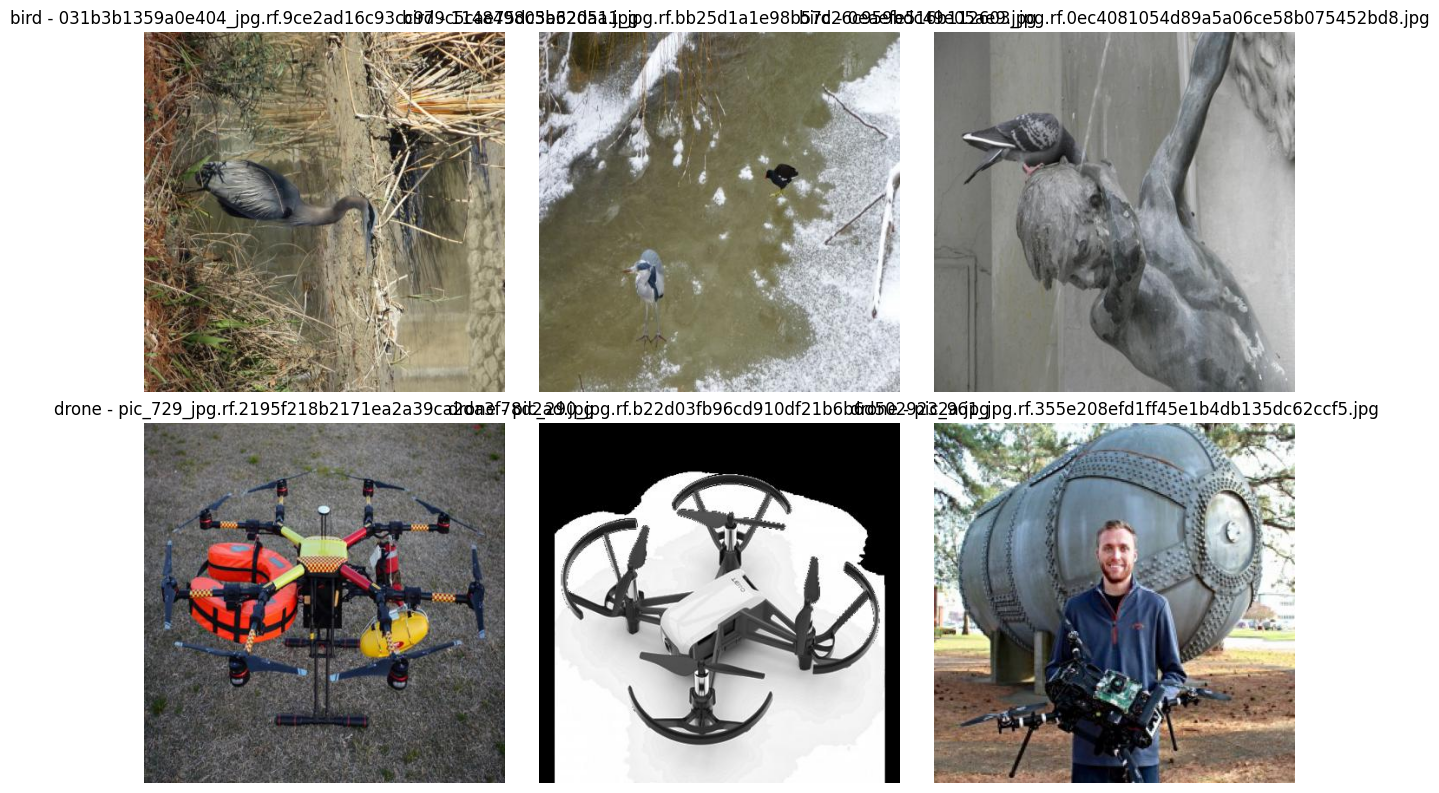

In [1]:
#Colab: 01_explore.ipynb
#Visualize folder structure & sample images
from google.colab import drive
drive.mount('/content/drive')
import os
PROJECT_ROOT='/content/drive/MyDrive/aerial_project'
CLASSIFICATION_DIR=os.path.join(PROJECT_ROOT, 'classification_dataset')
DETECTION_DIR=os.path.join(PROJECT_ROOT, 'object_detection_Dataset')
DATA_DIR=os.path.join(PROJECT_ROOT, 'data')
SAVED_MODELS=os.path.join(PROJECT_ROOT, 'saved_models')
RESULTS_DIR=os.path.join(PROJECT_ROOT, 'results')
#create important folders if they don't exist
os.makedirs(SAVED_MODELS, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)
print('PROJECT_ROOT:', PROJECT_ROOT)
print('CLASSIFICATION_DIR exists:', os.path.exists(CLASSIFICATION_DIR))
print('DETECTION_DIR exists:', os.path.exists(DETECTION_DIR))

from pathlib import Path
import random
from PIL import Image
import matplotlib.pyplot as plt

base=Path(CLASSIFICATION_DIR)
for split in ['train','valid','test']:
  for cls in ['bird','drone']:
    p=base/split/cls
    n=len(list(p.glob('*.jpg')))
    print(f"{split}/{cls}: {n}")

#show 6 samples (3 per class)
fig, axes=plt.subplots(2,3, figsize=(12,8))
for i, cls in enumerate(['bird','drone']):
  imgs=list((base/'train'/cls).glob('*.jpg'))
  samples=random.sample(imgs, min(6, len(imgs)))[:3]
  for j, p in enumerate(samples):
    axes[i,j].imshow(Image.open(p))
    axes[i,j].axis('off')
    axes[i,j].set_title(f'{cls} - {p.name}')
plt.tight_layout()